In [2]:
import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

import matplotlib.pyplot as plt
plt.style.use('ggplot')

%matplotlib inline

In [3]:
# path config
df = pd.read_csv("newfood.csv",usecols=['id','title','userId','stars',],dtype={'id': 'int32', 'title': 'str', 'userId' : 'int32', 'stars' : 'int32' })

In [4]:
df.head()

,id,title,stars,userId
0,1,Fried Anchovies with Sage,3,1
1,2,Anchovies Appetizer With Breadcrumbs & Scallions,1,1
2,3,"Carrots, Cauliflower And Anchovies",4,1
3,4,Bap Story Stir Fried Anchovies (Myulchi Bokkeum),3,1
4,5,"Bread, Butter And Anchovies",5,1


In [5]:
combine_recipe_rating = df.dropna(axis = 0, subset = ['title'])
recipe_ratingCount = (combine_recipe_rating.
     groupby(by = ['title'])['stars'].
     count().
     reset_index().
     rename(columns = {'stars': 'totalRatingCount'})
     [['title', 'totalRatingCount']]
    )
recipe_ratingCount.head()

,title,totalRatingCount
0,Tonight Caesar salad,1
1,Tonight Cornmeal-Crusted Pan-Fried Trout,1
2,Tonight Grilled Caesar salad,1
3,Tonight Mackerel with Currants,1
4,Tonight Marinated Chickpea salad,1


In [6]:
rating_with_totalRatingCount = combine_recipe_rating.merge(recipe_ratingCount, left_on = 'title', right_on = 'title', how = 'left')
rating_with_totalRatingCount.head()

,id,title,stars,userId,totalRatingCount
0,1,Fried Anchovies with Sage,3,1,1
1,2,Anchovies Appetizer With Breadcrumbs & Scallions,1,1,1
2,3,"Carrots, Cauliflower And Anchovies",4,1,1
3,4,Bap Story Stir Fried Anchovies (Myulchi Bokkeum),3,1,1
4,5,"Bread, Butter And Anchovies",5,1,1


In [7]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(recipe_ratingCount['totalRatingCount'].describe())

count   1645.000
mean       1.047
std        0.348
min        1.000
25%        1.000
50%        1.000
75%        1.000
max        8.000
Name: totalRatingCount, dtype: float64


In [8]:
popularity_threshold = 1
rating_popular_recipe= rating_with_totalRatingCount.query('totalRatingCount >= @popularity_threshold')
rating_popular_recipe.head()

,id,title,stars,userId,totalRatingCount
0,1,Fried Anchovies with Sage,3,1,1
1,2,Anchovies Appetizer With Breadcrumbs & Scallions,1,1,1
2,3,"Carrots, Cauliflower And Anchovies",4,1,1
3,4,Bap Story Stir Fried Anchovies (Myulchi Bokkeum),3,1,1
4,5,"Bread, Butter And Anchovies",5,1,1


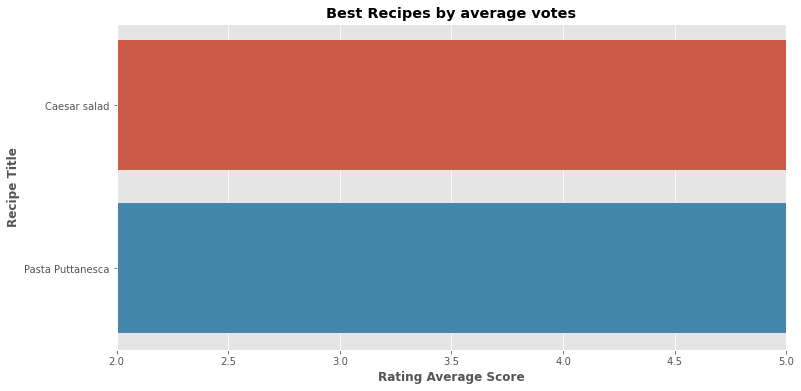

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

rating_count=rating_popular_recipe.sort_values('totalRatingCount',ascending=False)
plt.figure(figsize=(12,6))
axis1=sns.barplot(x=rating_count['totalRatingCount'].head(10), y=rating_count['title'].head(10), data=rating_count)
plt.xlim(2, 5)
plt.title('Best Recipes by average votes', weight='bold')
plt.xlabel('Rating Average Score', weight='bold')
plt.ylabel('Recipe Title', weight='bold')
plt.savefig('best_recipes.png')

In [9]:
rating_popular_recipe.shape

(1722, 5)

In [10]:
## First lets create a Pivot matrix

recipe_features_df=rating_popular_recipe.pivot_table(index='title',columns='userId',values='stars').fillna(1)
recipe_features_df.head()

userId,1,2,3,4,5,6,7,8,9,10,11,12,13,14
title,,,,,,,,,,,,,,
Tonight Caesar salad,1.000,1.000,1.000,1.000,1.000,1.000,5.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
Tonight Cornmeal-Crusted Pan-Fried Trout,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,4.000,1.000,1.000,1.000
Tonight Grilled Caesar salad,1.000,1.000,1.000,1.000,1.000,1.000,4.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
Tonight Mackerel with Currants,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,3.000,1.000,1.000,1.000
Tonight Marinated Chickpea salad,1.000,1.000,1.000,1.000,1.000,1.000,4.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


In [11]:
from sklearn.neighbors import NearestNeighbors
from scipy.sparse import csr_matrix

recipe_features_df_matrix = csr_matrix(recipe_features_df.values)

model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(recipe_features_df_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [12]:
recipe_features_df_matrix.shape

(1645, 14)

In [13]:
query_index = np.random.choice(recipe_features_df.shape[0])
print(query_index)
distances, indices = model_knn.kneighbors(recipe_features_df.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 10)

213


In [14]:
recipe_features_df.head()

userId,1,2,3,4,5,6,7,8,9,10,11,12,13,14
title,,,,,,,,,,,,,,
Tonight Caesar salad,1.000,1.000,1.000,1.000,1.000,1.000,5.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
Tonight Cornmeal-Crusted Pan-Fried Trout,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,4.000,1.000,1.000,1.000
Tonight Grilled Caesar salad,1.000,1.000,1.000,1.000,1.000,1.000,4.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
Tonight Mackerel with Currants,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,3.000,1.000,1.000,1.000
Tonight Marinated Chickpea salad,1.000,1.000,1.000,1.000,1.000,1.000,4.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


In [15]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(recipe_features_df.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, recipe_features_df.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for Caesar Soup:

1: Seafood Stoup Fra Diavolo, with distance of 4.440892098500626e-16:
2: Roast Lamb With Anchovies, with distance of 4.440892098500626e-16:
3: Orecchiette With Broccoli, Anchovies, And Chiles, with distance of 4.440892098500626e-16:
4: Green Herb & Yogurt Dip, with distance of 4.440892098500626e-16:
5: Broccoli Rabe Saute With Chicken Sausage, with distance of 4.440892098500626e-16:
6: Red Mullet With Tomatoes, Olives & Anchovies, with distance of 4.440892098500626e-16:
7: Radicchio Slaw With Green Beans And Cauliflower, with distance of 4.440892098500626e-16:
8: French Onion Tart, with distance of 4.440892098500626e-16:
9: Kale salad With Walnuts And Soft-boiled Eggs, with distance of 4.440892098500626e-16:
